# Catmull-Rom Analysis
This Notebook contains all the analysis made directly on the Catmull-Rom CSV file.

## Libraries

In [2]:
library(tidyverse)
library(DT) # dependency
library(ggthemes) # dependency

data <- read_csv("catmull-rom-dataset.csv")

Warning message:
"Missing column names filled in: 'X1492' [1492]"Warning message:
"Duplicated column names deduplicated: 'datetime' => 'datetime_1' [6]"Parsed with column specification:
cols(
  .default = col_double(),
  userId = col_character(),
  age = col_character(),
  datetime = col_character(),
  gender = col_character(),
  datetime_1 = col_character(),
  stage = col_integer(),
  condition = col_character(),
  subcondition = col_integer(),
  pageIndex = col_integer(),
  noiseIndex = col_integer(),
  day0 = col_character(),
  day1 = col_character(),
  day2 = col_character(),
  day3 = col_character(),
  day4 = col_character(),
  day5 = col_character(),
  day6 = col_character(),
  day7 = col_character(),
  day8 = col_character(),
  day9 = col_character()
  # ... with 70 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
"number of columns of result is not a multiple of vector length (arg 1)"Warning message:
"1452 parsing fai

## Preparing the data

Transform the day columns to two columns: day and value

In [36]:
tidy_data <- data %>% 
    gather(day, value, starts_with("day"))

Column transformations:

In [38]:
tidy_data$day <- as.numeric(gsub("day", "", tidy_data$day));
tidy_data$value <- as.numeric(tidy_data$value);

## Plot

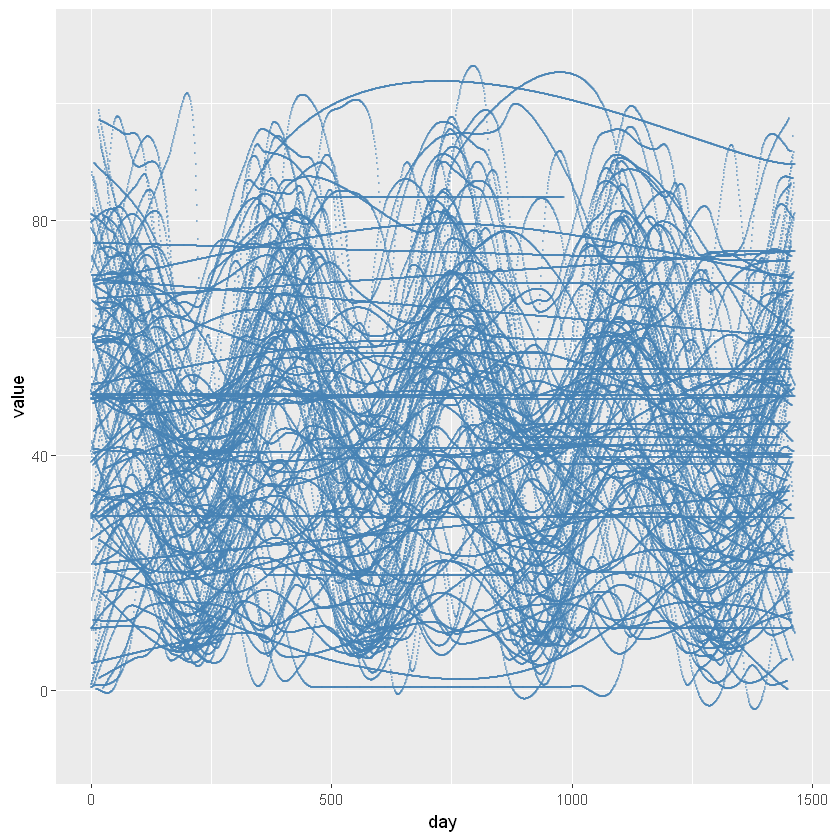

In [60]:
tidy_data %>%
    filter(stage == 1, 
           condition == 'rain',
           is.na(value) == FALSE,
           userId != 'a001') %>%
    ggplot(
        aes(day, value) ) + 
        geom_point(color='steelblue', size=0.2, alpha=0.4) + 
        ylim(-10, 110)